In [ ]:
import numpy as np

from PIL import Image
from google.colab import drive
import os
import zipfile
import gdown
from os import listdir

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 

import tensorflow as tf 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam 
from keras.optimizers import adam_v2

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU



In [ ]:
def readImage(path, IMG_SIZE):
    img = Image.open(path)     
    img = img.resize((IMG_SIZE, IMG_SIZE))                            
    imgArr = np.array(img)                                               
    return imgArr

In [ ]:
def unzip(path):
  zip = zipfile.ZipFile(path)
  zip.extractall()
  zip.close


In [ ]:
def download(id): 
    url = 'https://drive.google.com/uc?id=' + str(id)
    gdown.download(url, output = None, quiet = False)

In [ ]:
#drive.mount('/content/drive')

#Pasta dos gatos
download('1y6rfOjfHE8962ja5Epna_IDYfIN-dhmU') ##Isso é o id do arquivo, pega o link compartilhado e limpa

Downloading...
From: https://drive.google.com/uc?id=1y6rfOjfHE8962ja5Epna_IDYfIN-dhmU
To: /content/cats.zip
100%|██████████| 20.6M/20.6M [00:00<00:00, 42.9MB/s]


In [ ]:
#Pasta dos dogs
download('1YG0R_q4_k6PYMTdGDAH3ABJ3zFrEuCpi')

Downloading...
From: https://drive.google.com/uc?id=1YG0R_q4_k6PYMTdGDAH3ABJ3zFrEuCpi
To: /content/dogs.zip
100%|██████████| 24.3M/24.3M [00:00<00:00, 51.5MB/s]


In [ ]:
#Pasta dos pandas
#download('1nwm7HskbDLpD_8nF8_QWUfnkc2wPZWQ2')

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1nwm7HskbDLpD_8nF8_QWUfnkc2wPZWQ2 



In [ ]:
#!unzip '/content/drive/MyDrive/cats.zip'

unzip("/content/cats.zip")


In [ ]:
unzip("/content/dogs.zip")


In [ ]:
# unzip("/content/drive/MyDrive/pandas.zip")


In [ ]:
#Gatos

#Função do os, gera um arquivo com o nome de todos os arquivos da pasta
lista_gatos = listdir("/content/cats")
print(len(lista_gatos))
lista_gatos[0:5]

1000


['cats_00932.jpg',
 'cats_00770.jpg',
 'cats_00333.jpg',
 'cats_00016.jpg',
 'cats_00264.jpg']

In [ ]:
lista_dogs = listdir("/content/dogs")
print(len(lista_dogs))
lista_dogs[0:5]

1000


['dogs_00350.jpg',
 'dogs_00660.jpg',
 'dogs_00053.jpg',
 'dogs_00349.jpg',
 'dogs_00722.jpg']

In [ ]:
IMG_SIZE = 200 

img_cat = []
for arquivo in lista_gatos:
  caminho = "/content/cats/" + arquivo
  im = readImage(caminho, IMG_SIZE)
  img_cat.append(im)

img_cat = np.array(img_cat)
img_cat.shape

(1000, 200, 200, 3)

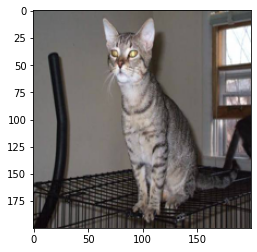

In [ ]:
plt.imshow(img_cat[10])

In [ ]:
#Cachorro

#Função do os, gera um arquivo com o nome de todos os arquivos da pasta
img_dog = []

for arquivo in lista_dogs:
  caminho = "/content/dogs/" + arquivo
  im = readImage(caminho, IMG_SIZE)
  img_dog.append(im)

img_dog = np.array(img_dog)
img_dog.shape

(1000, 200, 200, 3)

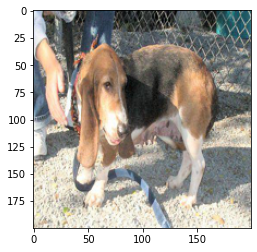

In [ ]:
plt.imshow(img_dog[2])

In [ ]:
'''
#Pandas

#Função do os, gera um arquivo com o nome de todos os arquivos da pasta
lista_panda = listdir("/content/panda")
img_dog = []

for arquivo in lista_panda:
  caminho = "/content/panda/" + arquivo
  im = readImage(caminho)
  img_panda.append(im)

img_panda = np.array(img_panda)

plt.imshow(img_panda[0])
print(len(img_panda))
type(img_panda[0])

'''
img_panda = []


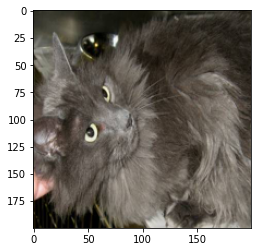

In [ ]:
# Usar função do numpy para concatenar arrays, se você somar ele literalmente soma uma imagem na outra
X = np.concatenate((img_cat, img_dog), axis=0)

plt.imshow(X[80])

In [ ]:
X.shape

(2000, 200, 200, 3)

In [ ]:
#Label y do gato

y_cat = []
for i in range(1000):
  y_cat.append(0)

len(y_cat)


1000

In [ ]:
#Label y do cachorro

y_dog = []
for i in range(1000):
  y_dog.append(1)

len(y_dog)

1000

In [ ]:
'''
#Label y do panda

y_panda = []
for i in range(1000):
  y_panda.append('panda')

len(y_panda)

'''
y_panda = []

In [ ]:
#One Hot

#Concatena tudo, já agrupado por numero
tudo = y_cat + y_dog + y_panda
tudo = np.array(tudo)
print(type(tudo))


y = to_categorical(tudo)
'''
#Chama a função one Hot
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = tudo.reshape(len(tudo), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
print(onehot_encoded[1999])

y = onehot_encoded

'''

<class 'numpy.ndarray'>


'\n#Chama a função one Hot\nonehot_encoder = OneHotEncoder(sparse=False)\ninteger_encoded = tudo.reshape(len(tudo), 1)\nonehot_encoded = onehot_encoder.fit_transform(integer_encoded)\nprint(onehot_encoded)\nprint(onehot_encoded[1999])\n\ny = onehot_encoded\n\n'

In [ ]:
y.shape

(2000, 2)

In [ ]:
#Separa os dados e converte para array do numpy

train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=45)

train_X = np.array(train_X)
test_X = np.array(test_X)
train_Y = np.array(train_Y)
test_Y = np.array(test_Y)

In [ ]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (1600, 200, 200, 3) (1600, 2)
Testing data shape :  (400, 200, 200, 3) (400, 2)


In [ ]:
#Identifica quantos valores diferentes tenho na minha saída

classes = np.unique(train_Y)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0. 1.]


Text(0.5, 1.0, 'Ground Truth : [1. 0.]')

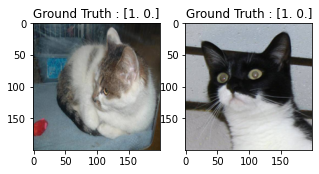

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [ ]:
train_X = train_X.reshape(-1, 200, 200,  1)
test_X = test_X.reshape(-1, 200, 200, 1)

train_X.shape, test_X.shape

((4800, 200, 200, 1), (1200, 200, 200, 1))

In [ ]:
train_Y = train_Y.reshape(-1, 1)
test_Y = test_Y.reshape(-1, 1)

train_Y.shape, test_Y.shape

((3200, 1), (800, 1))

In [ ]:

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')



In [ ]:
batch_size = 64
epochs = 15
num_classes = 2

In [ ]:
fashion_model = Sequential()

#Primeira Layer Covolucional - usamos pois trabalhamos com imagens

''' Definir o shape da imagem de entrada na primeira camada, i.e input_shape=()'''

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(200,200 ,3), padding='same'))

#Relu ajuda a rede a aprender padrões não lineares - temos 3 classes - não linear
#Relu é muuito usada em redes convolucionais, mais que as sigmoid
#O Leaky relu, ajuda a função a não dar erro quando o gradiente da zero, tornando esse zero um numero muito pequeno
fashion_model.add(LeakyReLU(alpha=0.1))


fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           


fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

In [ ]:
fashion_train = fashion_model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(test_X, test_Y))

Epoch 1/20
25/25 [==============================] - 129s 5s/step - loss: 147.3623 - accuracy: 0.5050 - val_loss: 3.1075 - val_accuracy: 0.4975
Epoch 2/20
25/25 [==============================] - 124s 5s/step - loss: 1.5404 - accuracy: 0.5525 - val_loss: 0.9065 - val_accuracy: 0.5475
Epoch 3/20
25/25 [==============================] - 125s 5s/step - loss: 0.7795 - accuracy: 0.6212 - val_loss: 0.7809 - val_accuracy: 0.6200
Epoch 4/20
25/25 [==============================] - 125s 5s/step - loss: 0.6560 - accuracy: 0.6538 - val_loss: 0.7487 - val_accuracy: 0.6100
Epoch 5/20
25/25 [==============================] - 125s 5s/step - loss: 0.5781 - accuracy: 0.6938 - val_loss: 0.6252 - val_accuracy: 0.6925
Epoch 6/20
25/25 [==============================] - 125s 5s/step - loss: 0.7910 - accuracy: 0.6413 - val_loss: 0.9490 - val_accuracy: 0.5175
Epoch 7/20
25/25 [==============================] - 127s 5s/step - loss: 0.6123 - accuracy: 0.6919 - val_loss: 0.6286 - val_accuracy: 0.6800
Epoch 8/20


In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.7728425860404968
Test accuracy: 0.6850000023841858


In [ ]:
#Open image using Image module
#im = Image.open("cats_00001.jpg")
#Show actual Image
#display(im)
#Show rotated Image
#im = im.rotate(45)
#im.show()